In [2]:
import sys

sys.path.insert(0, "..")
import librosa
import librosa.display
import numpy as np
import pygame
from sunflower.song_loader import Song, load_from_disk
import matplotlib.pyplot as plt


## Bugged spectogram

In [4]:
filename = "../data_benchmark/test_eq.wav"
raw_audio, extension = load_from_disk(filename)

song = Song(raw_audio, extension)

time_series = song.mono_waveform

print(song.waveform.shape)
print(time_series.shape)



(2, 336001)
(336001,)


/Users/julienbeisel/Documents/git repos/camelia/venv/lib/python3.7/site-packages/librosa/display.py:862: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/Users/julienbeisel/Documents/git repos/camelia/venv/lib/python3.7/site-packages/librosa/display.py:862: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/Users/julienbeisel/Documents/git repos/camelia/venv/lib/python3.7/site-packages/librosa/display.py:862: MatplotlibDeprecationWarning: The 'linscaley' parameter of __init__() has been renamed 'linscale' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)


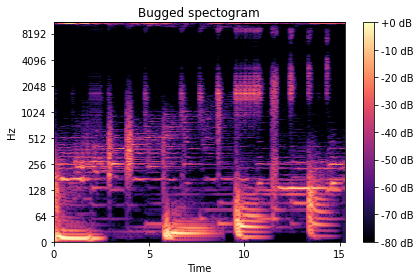

In [5]:
time_series, sample_rate = (
    time_series,
    song.sr,
)  # getting information from the file


# getting a matrix which contains amplitude values according to frequency and time indexes
stft = np.abs(librosa.stft(time_series, hop_length=512, n_fft=2048 * 4))

spectrogram = librosa.amplitude_to_db(
    stft, ref=np.max
)  # converting the matrix to decibel matrix
librosa.display.specshow(spectrogram, y_axis="log", x_axis="time")
plt.title("Bugged spectogram")
plt.colorbar(format="%+2.0f dB")
plt.tight_layout()
plt.show()

## Working example

In [7]:
filename = "../data_benchmark/test_eq.wav"

time_series, sample_rate = librosa.load(filename)  # getting information from the file

print(time_series.shape)

(168001,)


/Users/julienbeisel/Documents/git repos/camelia/venv/lib/python3.7/site-packages/librosa/display.py:862: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/Users/julienbeisel/Documents/git repos/camelia/venv/lib/python3.7/site-packages/librosa/display.py:862: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/Users/julienbeisel/Documents/git repos/camelia/venv/lib/python3.7/site-packages/librosa/display.py:862: MatplotlibDeprecationWarning: The 'linscaley' parameter of __init__() has been renamed 'linscale' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)


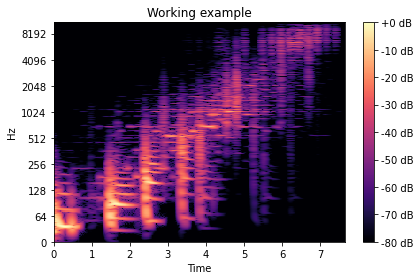

In [8]:
# getting a matrix which contains amplitude values according to frequency and time indexes
stft = np.abs(librosa.stft(time_series, hop_length=512, n_fft=2048 * 4))

spectrogram = librosa.amplitude_to_db(
    stft, ref=np.max
)  # converting the matrix to decibel matrix

librosa.display.specshow(spectrogram, y_axis="log", x_axis="time")
plt.title("Working example")
plt.colorbar(format="%+2.0f dB")
plt.tight_layout()
plt.show()